## Enoncé

Lorsqu'il explore la cave de la maison familiale, un ami à vous tombe sur les archives de son grand père, pionnier de l'informatique dans les années 70. Parmi la myriade de documents, il trouve des cartes perforées accompagnées d'un document, ainsi que de la mention "IBM029". Sur les 79 cartes seules les 53 premières sont correctement numérotées, les dernières étaient dans une boîte qui a souffert du temps et a effacé les étiquettes collées dessus.

Curieux de ce que ces cartes perforées renferment, il les scanne et vous fournit le fichier cards.tar.gz pour que vous l'analysiez. Saurez-vous l'aider ?

## Réponse

On fait une petite exploration des cartes perforées

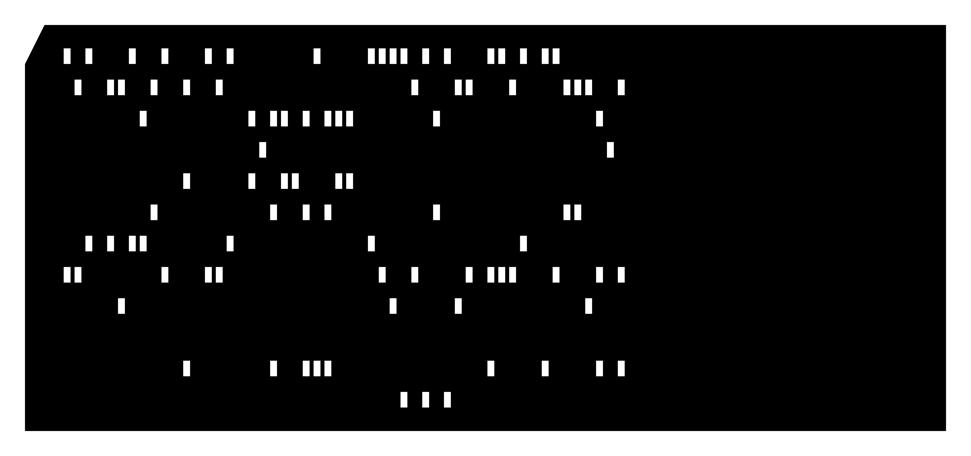

In [108]:
from IPython.display import Image
Image(filename='cards/0000000052.jpg') 

On convertit les images des cartes perforées en texte

In [98]:
import cv2
from os import walk


def convertImage(imageName):
    img = cv2.imread('cards/' + imageName)
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale image to create a binary image
    thresh_value, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    xRead = [55, 67, 78, 88, 99, 110, 121, 132, 143, 154, 164, 175, 186, 197, 208, 219, 230,
             241, 251, 262, 273, 284, 295, 306, 317, 327, 338, 349, 360, 371, 382, 393, 404,
             414, 425, 436, 447, 458, 469, 480, 490, 501, 512, 523, 534, 545, 556, 566, 577,
             588, 599, 610, 621, 632, 643, 654, 665, 675, 686, 697, 708, 719, 730, 741, 752,
             763, 773, 784, 795, 806, 817, 827, 838, 849, 860, 871, 882, 893
             ]
    
    yRead = [
        56, 87, 118, 150, 181, 212, 243, 274, 306, 338, 369, 399
    ]
    
    myString = ''
    for y in yRead:
        for x in xRead:
            pixel = binary[y, x]
            if pixel == 0:
                myString += "_,"
            else:
                myString += "O,"
        myString += '\n'
    fileNameOnly  = imageName.split(".")[0] 
    with open("texts/"+fileNameOnly+'.txt', 'w') as file:
        file.write(myString)
filenames = next(walk("cards"), (None, None, []))[2]  # [] if no file
print(len(filenames))
for thisFiles in filenames :
    convertImage(thisFiles)

79


### The IBM model 029 keypunch

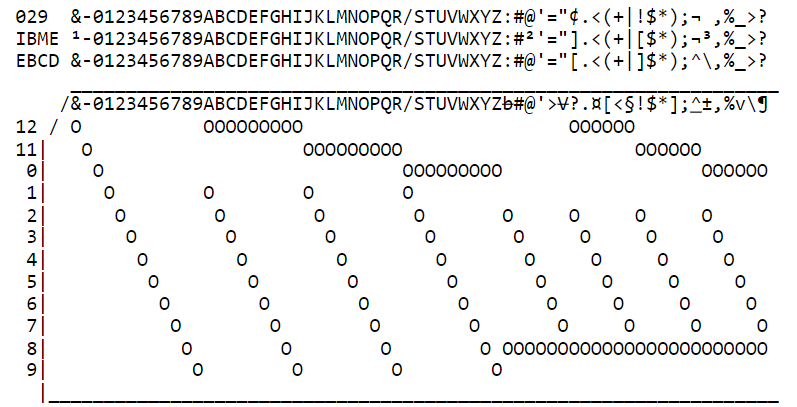

In [110]:
Image(filename='IBM029.png') 

Qu'on peut convertir en un dictionnaire de correspondance alphabet <==> Liste de perforation (True quand il y a perforation, False quand il en n'a pas)

In [87]:
dictionnary = {
    "&" : [True, False, False, False, False, False, False, False, False, False, False, False],
    "-" : [False, True, False, False, False, False, False, False, False, False, False, False],
    "0" : [False, False, True, False, False, False, False, False, False, False, False, False],
    "1" : [False, False, False, True, False, False, False, False, False, False, False, False],
    "2" : [False, False, False, False, True, False, False, False, False, False, False, False],
    "3" : [False, False, False, False, False, True, False, False, False, False, False, False],
    "4" : [False, False, False, False, False, False, True, False, False, False, False, False],
    "5" : [False, False, False, False, False, False, False, True, False, False, False, False],
    "6" : [False, False, False, False, False, False, False, False, True, False, False, False],
    "7" : [False, False, False, False, False, False, False, False, False, True, False, False],
    "8" : [False, False, False, False, False, False, False, False, False, False, True, False],
    "9" : [False, False, False, False, False, False, False, False, False, False, False, True],
    "A" : [True, False, False, True, False, False, False, False, False, False, False, False],
    "B" : [True, False, False, False, True, False, False, False, False, False, False, False],
    "C" : [True, False, False, False, False, True, False, False, False, False, False, False],
    "D" : [True, False, False, False, False, False, True, False, False, False, False, False],
    "E" : [True, False, False, False, False, False, False, True, False, False, False, False],
    "F" : [True, False, False, False, False, False, False, False, True, False, False, False],
    "G" : [True, False, False, False, False, False, False, False, False, True, False, False],
    "H" : [True, False, False, False, False, False, False, False, False, False, True, False],
    "I" : [True, False, False, False, False, False, False, False, False, False, False, True],
    "J" : [False, True, False, True, False, False, False, False, False, False, False, False],
    "K" : [False, True, False, False, True, False, False, False, False, False, False, False],
    "L" : [False, True, False, False, False, True, False, False, False, False, False, False],
    "M" : [False, True, False, False, False, False, True, False, False, False, False, False],
    "N" : [False, True, False, False, False, False, False, True, False, False, False, False],
    "O" : [False, True, False, False, False, False, False, False, True, False, False, False],
    "P" : [False, True, False, False, False, False, False, False, False, True, False, False],
    "Q" : [False, True, False, False, False, False, False, False, False, False, True, False],
    "R" : [False, True, False, False, False, False, False, False, False, False, False, True],
    "/" : [False, False, True, True, False, False, False, False, False, False, False, False],
    "S" : [False, False, True, False, True, False, False, False, False, False, False, False],
    "T" : [False, False, True, False, False, True, False, False, False, False, False, False],
    "U" : [False, False, True, False, False, False, True, False, False, False, False, False],
    "V" : [False, False, True, False, False, False, False, True, False, False, False, False],
    "W" : [False, False, True, False, False, False, False, False, True, False, False, False],
    "X" : [False, False, True, False, False, False, False, False, False, True, False, False],
    "Y" : [False, False, True, False, False, False, False, False, False, False, True, False],
    "Z" : [False, False, True, False, False, False, False, False, False, False, False, True],
    ":" : [False, False, False, False, True, False, False, False, False, False, True, False],
    "#" : [False, False, False, False, False, True, False, False, False, False, True, False],
    "@" : [False, False, False, False, False, False, True, False, False, False, True, False],
    "'" : [False, False, False, False, False, False, False, True, False, False, True, False],
    "=" : [False, False, False, False, False, False, False, False, True, False, True, False],
    "\"" : [False, False, False, False, False, False, False, False, False, True, True, False],
    "¢" : [True, False, False, False, True, False, False, False, False, False, True, False],
    "." : [True, False, False, False, False, True, False, False, False, False, True, False],
    "<" : [True, False, False, False, False, False, True, False, False, False, True, False],
    "(" : [True, False, False, False, False, False, False, True, False, False, True, False],
    "+" : [True, False, False, False, False, False, False, False, True, False, True, False],
    "|" : [True, False, False, False, False, False, False, False, False, True, True, False],
    "!" : [False, True, False, False, True, False, False, False, False, False, True, False],
    "$" : [False, True, False, False, False, True, False, False, False, False, True, False],
    "*" : [False, True, False, False, False, False, True, False, False, False, True, False],
    ")" : [False, True, False, False, False, False, False, True, False, False, True, False],
    ";" : [False, True, False, False, False, False, False, False, True, False, True, False],
    "¬" : [False, True, False, False, False, False, False, False, False, True, True, False],
    " " : [False, False, True, False, True, False, False, False, False, False, True, False],
    "," : [False, False, True, False, False, True, False, False, False, False, True, False],
    "%" : [False, False, True, False, False, False, True, False, False, False, True, False],
    "_" : [False, False, True, False, False, False, False, True, False, False, True, False],
    ">" : [False, False, True, False, False, False, False, False, True, False, True, False],
    "?" : [False, False, True, False, False, False, False, False, False, True, True, False],
}

Nous avons plutôt besoin d'un dictionnaire qui donne la correspondance entre le 12 ligne de la colonne et le caractère.

In [99]:
dictionnary = {
   "____________"  : " ",
   "O___________"  : "&",
   "_O__________"  : "-",
   "__O_________"  : "0",
   "___O________"  : "1",
   "____O_______"  : "2",
   "_____O______"  : "3",
   "______O_____"  : "4",
   "_______O____"  : "5",
   "________O___"  : "6",
   "_________O__"  : "7",
   "__________O_"  : "8",
   "___________O"  : "9",
   "O__O________"  : "A",
   "O___O_______"  : "B",
   "O____O______"  : "C",
   "O_____O_____"  : "D",
   "O______O____"  : "E",
   "O_______O___"  : "F",
   "O________O__"  : "G",
   "O_________O_"  : "H",
   "O__________O"  : "I",
   "_O_O________"  : "J",
   "_O__O_______"  : "K",
   "_O___O______"  : "L",
   "_O____O_____"  : "M",
   "_O_____O____"  : "N",
   "_O______O___"  : "O",
   "_O_______O__"  : "P",
   "_O________O_"  : "Q",
   "_O_________O"  : "R",
   "__OO________"  : "/",
   "__O_O_______"  : "S",
   "__O__O______"  : "T",
   "__O___O_____"  : "U",
   "__O____O____"  : "V",
   "__O_____O___"  : "W",
   "__O______O__"  : "X",
   "__O_______O_"  : "Y",
   "__O________O"  : "Z",
   "____O_____O_"  : ":",
   "_____O____O_"  : "#",
   "______O___O_"  : "@",
   "_______O__O_"  : "'",
   "________O_O_"  : "=",
   "_________OO_"  : "\\",
   "O___O_____O_"  : "¢",
   "O____O____O_"  : ".",
   "O_____O___O_"  : "<",
   "O______O__O_"  : "(",
   "O_______O_O_"  : "+",
   "O________OO_"  : "|",
   "_O__O_____O_"  : "!",
   "_O___O____O_"  : "$",
   "_O____O___O_"  : "*",
   "_O_____O__O_"  : ")",
   "_O______O_O_"  : ";",
   "_O_______OO_"  : "¬",
   "__O_O_____O_"  : " ",
   "__O__O____O_"  : ",",
   "__O___O___O_"  : "%",
   "__O____O__O_"  : "_",
   "__O_____O_O_"  : ">",
   "__O______OO_"  : "?",
}



### Décodage

Maintenant qu'on a le dictionnaire de correspondance et les perforations sur un fichier texte.
Nous pourrons parcourir tous les fichiers générés et décoder l'information

In [111]:
import csv

def decodeFile(fileName, f):
    with open('texts/'+fileName, newline='') as csvfile:
        reader = csv.reader(csvfile)
        listOfRows = []
        for row in reader:
            listOfRows.append(row)
    decodedMessage = ''
    for j in range(79) :
        code = ""
        for i in range(len(listOfRows)) :
            code += listOfRows[i][j]
        #print(code)
        decodedCharacter = dictionnary.get(code)
        #print(decodedCharacter)
        if decodedCharacter != None :
            decodedMessage += decodedCharacter
    print(decodedMessage)
    f.write(decodedMessage + '\n')
filenames = next(walk("texts"), (None, None, []))[2]  # [] if no file

with open('code.txt', 'a') as f:
    for thisFiles in filenames :
        print(thisFiles)
        decodeFile(thisFiles, f)    

0000000001.txt
! --------------------------------------------------                          
0000000002.txt
MODULE HELLO_1         ! BEGIN S1,S2,H,SS DEFINITION                          
0000000003.txt
! --------------------------------------------------                          
0000000004.txt
  INTEGER :: S1(256) = (/ 96,172,121,222,15,140,53,104,39,145,51,250,217,  &  
0000000005.txt
 27,32,127,70,179,21,46,236,189,143,133,77,171,208,223,113,139,158,54,203,227,
0000000006.txt
 160, &                                                                       
0000000007.txt
 95,99,155,85,169,103,130,238,31,226,41,52,90,152,183,8,173,72,131,229,231,243
0000000008.txt
 184, &                                                                       
0000000009.txt
 199,146,134,6,249,4,117,84,151,201,47,25,180,33,79,230,166,142,10,161,233,7,&
0000000010.txt
 112, &                                                                       
0000000011.txt
 255,126,19,138,193,83,125,168,106,24,48,198,

## Du code Fortran !

On tombe en résultat sur du code Fortran suivant :

! --------------------------------------------------                          
MODULE HELLO_1         ! BEGIN S1,S2,H,SS DEFINITION                          
! --------------------------------------------------                          
  INTEGER :: S1(256) = (/ 96,172,121,222,15,140,53,104,39,145,51,250,217,  &  
 27,32,127,70,179,21,46,236,189,143,133,77,171,208,223,113,139,158,54,203,227,
 160, &                                                                       
 95,99,155,85,169,103,130,238,31,226,41,52,90,152,183,8,173,72,131,229,231,243
 184, &                                                                       
 199,146,134,6,249,4,117,84,151,201,47,25,180,33,79,230,166,142,10,161,233,7,&
 112, &                                                                       
 255,126,19,138,193,83,125,168,106,24,48,198,177,209,2,56,185,108,16,200,65, &
 186, &                                                                       
 225,12,167,137,105,98,43,62,150,147,38,149,251,49,234,119,212,29,86,129,110,&
 93, &                                                                        
 204,9,34,74,73,176,120,195,67,205,123,196,244,175,241,102,245,162,248,218, & 
 232,219,  &                                                                  
 59,28,197,87,170,221,57,92,214,37,247,116,100,26,239,107,216,188,148,22,&    
 60,192,  &                                                                   
 13,23,80,91,44,66,42,153,18,40,76,165,220,206,144,115,82,114,20,253,202,&    
 174,215,  &                                                                  
 163,211,78,124,228,11,0,1,97,58,35,128,61,14,159,17,132,94,178,252,182,&     
 240,111,  &                                                                  
 141,71,187,235,213,154,63,190,3,45,75,191,135,207,101,88,118,181,89,164,&    
 50,36,55,  &                                                                 
 246,81,254,242,30,210,194,237,157,136,224,69,109,156,122,64,5,68 /)          
  INTEGER :: S2(256) = (/ 216,182,122,143,69,3,117,72,42,134,53,75,179,  &    
 49,27,189,26,30,254,78,83,139,194,237,60,93,70,105,109,240,178,46,158,210,&  
 193,24,  &                                                                   
 172,141,23,156,234,31,220,62,145,127,4,51,19,176,247,255,111,81,55,135,71,&  
 0,177,  &                                                                    
 38,211,155,166,90,181,224,202,195,137,221,43,170,201,159,230,44,108,196,&    
 133,132,  &                                                                  
 183,144,225,120,129,147,121,164,136,45,157,1,186,115,13,206,68,217,252,&     
 251,233,  &                                                                  
 95,59,184,187,241,37,113,98,25,162,235,118,47,79,35,80,50,89,250,192,229,&   
 110,56,  &                                                                   
 58,185,40,150,253,205,191,87,231,124,223,198,173,160,142,222,239,226,190,&   
 168,167,  &                                                                  
 174,207,21,140,76,28,52,152,100,14,16,48,163,92,33,197,154,238,161,15,84,&   
 116,11,  &                                                                   
 12,73,232,128,215,67,204,8,209,20,96,17,200,188,9,214,104,131,91,64,99,18,&  
 61,249,  &                                                                   
 203,153,138,36,103,5,39,22,151,227,41,165,219,246,101,74,236,65,218,180,148,&
 123,  &                                                                      
 242,85,57,29,169,63,54,146,245,7,77,106,32,208,126,149,175,94,212,130,114,6,&
 125,  &                                                                      
 213,112,119,66,244,102,82,10,97,248,86,107,243,34,228,171,2,199,88 /)        
  INTEGER :: H(30) = (/ 17,10,1,18,25,28,27,14,22,20,4,8,15,5,26,19,6,12,  &  
 7,21,3,29,13,23,9,24,0,16,11,2 /)                                            
  INTEGER :: SS(30) = (/ 68,180,51,31,68,20,206,229,56,160,219,251,169,  &    
 184,56,229,206,66,160,186,51,153,83,68,56,157,160,68,56,187 /)               
 END MODULE ! END S1,S2,H,SS DEFINITION (END HELLO_1)                         
! --------------------------------------------------                          
901 FORMAT (99A)                                                              
  DO I = 0,29,1                                                               
! - - - - - -                                                                 
  DO I = 0,29,1                                                               
  CHARACTER :: SSSS(0:255)                                                    
  INTEGER :: SSS(0:255)                                                       
  END DO                                                                      
! - - - - - -                                                                 
END PROGRAM                                                                   
PROGRAM HELLO                                                                 
    SSSS(I:I) = CHAR(SSS(I:I))                                                
    SSS(I:I) = S2(SS(I+1)+1:SS(I+1)+1)                                        
  INTEGER :: I                                                                
USE HELLO_1                                                                   
  END DO                                                                      
! --------------------------------------------------                          
  WRITE (*,901,ADVANCE='YES') ''                                              
  STOP 0                                                                      
  DO I = 0,29,1                                                               
IMPLICIT NONE                                                                 
  DO I = 0,29,1                                                               
    SS(H(I+1)+1:H(I+1)+1) = SSS(I:I)                                          
    WRITE (*,901,ADVANCE='NO') SSSS(I:I)                                      
    SSS(I:I) = S1(SS(I+1)+1:SS(I+1)+1)                                        
  END DO                                                                      
  END DO                                                                      


## Réorganisation des lignes du code

Comme mentionné dans l'énoncé, à partir de l'image 53 le reste des images n'est pas dans l'ordre.
Donc de même pour les lignes de code, à partir de la ligne 53 rien n'est dans l'ordre.
On y voit vite l'existance de 4 boucle, ainsi que de l'indentation.
Il y a une dépendance entre les listes.
Tous cela nous aidera à remettre dans l'ordre notre code Fortran

Ensuite, j'ai choisi de convertir ce code en Python

In [112]:
S1 = [ 96,172,121,222,15,140,53,104,39,145,51,250,217,27,32,127,70,179,21,46,236,189,143,133,77,171,208,223,113,139,158,54,203,227,160,95,99,155,85,169,103,130,238,31,226,41,52,90,152,183,8,173,72,131,229,231,243,184,199,146,134,6,249,4,117,84,151,201,47,25,180,33,79,230,166,142,10,161,233,7,112,255,126,19,138,193,83,125,168,106,24,48,198,177,209,2,56,185,108,16,200,65,186,225,12,167,137,105,98,43,62,150,147,38,149,251,49,234,119,212,29,86,129,110,93,204,9,34,74,73,176,120,195,67,205,123,196,244,175,241,102,245,162,248,218,232,219,59,28,197,87,170,221,57,92,214,37,247,116,100,26,239,107,216,188,148,22,60,192,13,23,80,91,44,66,42,153,18,40,76,165,220,206,144,115,82,114,20,253,202,174,215,163,211,78,124,228,11,0,1,97,58,35,128,61,14,159,17,132,94,178,252,182,240,111,141,71,187,235,213,154,63,190,3,45,75,191,135,207,101,88,118,181,89,164,50,36,55,246,81,254,242,30,210,194,237,157,136,224,69,109,156,122,64,5,68]          
S2 = [216,182,122,143,69,3,117,72,42,134,53,75,179,49,27,189,26,30,254,78,83,139,194,237,60,93,70,105,109,240,178,46,158,210,193,24,172,141,23,156,234,31,220,62,145,127,4,51,19,176,247,255,111,81,55,135,71,0,177,38,211,155,166,90,181,224,202,195,137,221,43,170,201,159,230,44,108,196,133,132,183,144,225,120,129,147,121,164,136,45,157,1,186,115,13,206,68,217,252,251,233,95,59,184,187,241,37,113,98,25,162,235,118,47,79,35,80,50,89,250,192,229,110,56,58,185,40,150,253,205,191,87,231,124,223,198,173,160,142,222,239,226,190,168,167,174,207,21,140,76,28,52,152,100,14,16,48,163,92,33,197,154,238,161,15,84,116,11,12,73,232,128,215,67,204,8,209,20,96,17,200,188,9,214,104,131,91,64,99,18,61,249,203,153,138,36,103,5,39,22,151,227,41,165,219,246,101,74,236,65,218,180,148,123,242,85,57,29,169,63,54,146,245,7,77,106,32,208,126,149,175,94,212,130,114,6,125,213,112,119,66,244,102,82,10,97,248,86,107,243,34,228,171,2,199,88]        
H = [17,10,1,18,25,28,27,14,22,20,4,8,15,5,26,19,6,12,7,21,3,29,13,23,9,24,0,16,11,2]                                            
SS = [68,180,51,31,68,20,206,229,56,160,219,251,169,184,56,229,206,66,160,186,51,153,83,68,56,157,160,68,56,187]  


print(len(S1))
print(len(S2))
print(len(H))
print(len(SS))
print("----------")
SSSS = ['']*256
SSS = [0]*256
  
for I in range(30):
    SSS[I] = S1[SS[I]]
    
for I in range(30):
    SS[H[I]] = SSS[I]
    

for I in range(30):
    print("S2[SS[I+1]+1] :", S2[SS[I]])
    SSS[I] = S2[SS[I]]
    
    
for I in range(30):
    SSSS[I] = chr(SSS[I])
    print(f"{SSSS[I]}", end='', flush=True)


256
256
30
30
----------
S2[SS[I+1]+1] : 70
S2[SS[I+1]+1] : 67
S2[SS[I+1]+1] : 83
S2[SS[I+1]+1] : 67
S2[SS[I+1]+1] : 123
S2[SS[I+1]+1] : 35
S2[SS[I+1]+1] : 33
S2[SS[I+1]+1] : 70
S2[SS[I+1]+1] : 48
S2[SS[I+1]+1] : 82
S2[SS[I+1]+1] : 84
S2[SS[I+1]+1] : 82
S2[SS[I+1]+1] : 52
S2[SS[I+1]+1] : 78
S2[SS[I+1]+1] : 95
S2[SS[I+1]+1] : 49
S2[SS[I+1]+1] : 51
S2[SS[I+1]+1] : 51
S2[SS[I+1]+1] : 55
S2[SS[I+1]+1] : 95
S2[SS[I+1]+1] : 70
S2[SS[I+1]+1] : 79
S2[SS[I+1]+1] : 82
S2[SS[I+1]+1] : 51
S2[SS[I+1]+1] : 86
S2[SS[I+1]+1] : 51
S2[SS[I+1]+1] : 82
S2[SS[I+1]+1] : 33
S2[SS[I+1]+1] : 125
S2[SS[I+1]+1] : 0
FCSC{#!F0RTR4N_1337_FOR3V3R!} 

Le flag est affiché à la fin de la dernière boucle :

FCSC{#!F0RTR4N_1337_FOR3V3R!}